In [0]:
% cd ../
! cp -r '/content/drive/My Drive/image/dataset_sieuAmTim14032020.tar.gz' '/content/'

/


In [0]:
%cd content/
! tar -zxvf dataset_sieuAmTim14032020.tar.gz

Streaming output truncated to the last 5000 lines.
dataset/training_set/4C/GEMS_IMG__2013_JUN__11__WV134500__F8HFSS4A_25.jpg
dataset/training_set/4C/GEMS_IMG__2014_DEC__16__PC123304__F8HB5T0S_4.jpg
dataset/training_set/4C/VNHospital__EHospital__20191126__1.2.840.113663.1500.1.428468407.1.1.20191120.144334.425__IM_0328_94.jpg
dataset/training_set/4C/GEMS_IMG__2015_APR__29__WK113923__F8HB0KD8_31.jpg
dataset/training_set/4C/VNHospital__EHospital__20191126__1.2.840.113663.1500.1.428468407.1.1.20191120.153849.486__IM_0391_44.jpg
dataset/training_set/4C/From40Frs__NGUYEN VAN TOAN 53T__4C__IMG-0005-00001.dcm_46.jpg
dataset/training_set/4C/From20Frs__MINH64 HSTC HCM apex EF N__4C__IMG-0110-00001.dcm_36.jpg
dataset/training_set/4C/GEMS_IMG__2010_NOV__08__GP212407__F8HD28A2_6.jpg
dataset/training_set/4C/From20Frs__PHAM THI LUAN L3 ARTIFICIAL MV EF N MISSING 3C__4C__IMG-0191-00001.dcm_37.jpg
dataset/training_set/4C/VNHospital__EHospital__20191126__1.2.840.113663.1500.1.428468407.1.1.20191120.1538

In [0]:
!cp -r '/content/drive/My Drive/image/DATA_CHAMBER_2020-03-03.zip' '/content/'

^C


In [0]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
!pwd

/content


In [0]:
%cd /content/

/content


In [0]:
!ls

dataset				  model_ep_12.pt  model_ep_1.pt  model_ep_7.pt
dataset_sieuAmTim14032020.tar.gz  model_ep_13.pt  model_ep_2.pt  model_ep_8.pt
drive				  model_ep_14.pt  model_ep_3.pt  model_ep_9.pt
model_ep_0.pt			  model_ep_15.pt  model_ep_4.pt  sample_data
model_ep_10.pt			  model_ep_16.pt  model_ep_5.pt  save_model
model_ep_11.pt			  model_ep_17.pt  model_ep_6.pt


In [0]:
!unzip -q 'DATA_CHAMBER_2020-03-03.zip'

unzip:  cannot find or open DATA_CHAMBER_2020-03-03.zip, DATA_CHAMBER_2020-03-03.zip.zip or DATA_CHAMBER_2020-03-03.zip.ZIP.


In [0]:
!mkdir dataset

In [0]:
%cd dataset
!mkdir training_set
!mkdir test_set
%cd training_set
!mkdir 2C
!mkdir 3C
!mkdir 4C

/content/dataset
/content/dataset/training_set


In [0]:
%cd ../test_set/
!mkdir 2C
!mkdir 3C
!mkdir 4C

/content/dataset/test_set


In [0]:
%cd ../../

/content


In [0]:
%cd DATA_CHAMBER_2020-03-03/2C

/content/DATA_CHAMBER_2020-03-03/2C


In [0]:
!shuf -zen2290 *.jpg | xargs -0 mv -t ../../dataset/training_set/4C/

In [0]:
%cd ../../test_set/4C/

/content/dataset/test_set/4C


In [0]:
%cd ../../../DATA_CHAMBER_2020-03-03/4C

/content/DATA_CHAMBER_2020-03-03/4C


In [0]:

!ls -l | grep ^- | wc -l

2290


In [0]:

!ls -l | grep ^- | wc -l

572


In [0]:
%cd dataset/training_set/4C/

/content/dataset/training_set/4C


In [0]:
!pwd

/content/dataset/test_set/4C


In [0]:
!mv *.jpg ../../dataset/test_set/4C/

In [0]:
%cd ../3C

/content/DATA_CHAMBER_2020-03-03/3C


In [0]:
!mv *.jpg ../../dataset/test_set/3C/

In [0]:
%cd ../2C
!mv *.jpg ../../dataset/test_set/2C/

/content/DATA_CHAMBER_2020-03-03/2C


In [0]:
%cd ../../dataset/test_set/2C/

/content/dataset/test_set/2C


In [0]:
%cd ../4C

/content/dataset/test_set/4C


In [0]:
%cd ../../../

/content


In [0]:
!ls

dataset  dataset_sieuAmTim14032020.tar.gz  drive  sample_data


In [0]:
!shuf -zen58 dataset/training_set/4C/* | xargs -0 rm

In [0]:
!shuf -zen66 dataset/test_set/4C/* | xargs -0 rm

In [0]:
!tar -zcvf dataset_sieuAmTim14032020.tar.gz dataset

In [0]:
!cp -r 'dataset_sieuAmTim14032020.tar.gz' 'drive/My Drive/image/'

Completely create Folder structure for Training and Testing 

---



'dataset' folder is used now

dataset information:
  + original source: DATA_CHAMBER_2020-03-03
  + dataset contains:
            - test_set
              --2C
              --3C
              --3C
              --4C
            - training_set
              --2C
              --3C
              --4C
  + training set is randomly choose from the original DATA_CHAMBER_2020-03-03 ( training set accounts for ~80% of original data source)
  + test set is the rest of the original data source. ( which is 20%)

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import nn

In [0]:
transform = transforms.Compose([transforms.Resize((100,150)),
                                transforms.CenterCrop((80,110)),
                                transforms.Grayscale(),
                                transforms.ToTensor(),
                                transforms.Normalize( [0.5], [0.5])])

In [0]:
training_dataset = datasets.ImageFolder(root='dataset/training_set',transform=transform)
validation_dataset = datasets.ImageFolder(root='dataset/test_set',transform=transform)

In [0]:
print(training_dataset.class_to_idx)

{'2C': 0, '3C': 1, '4C': 2}


In [0]:
training_loader =  torch.utils.data.DataLoader(dataset=training_dataset,  batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,  batch_size=100, shuffle=True)

In [0]:
print(training_loader.dataset,'\n', validation_loader.dataset)

Dataset ImageFolder
    Number of datapoints: 6600
    Root location: dataset/training_set
    StandardTransform
Transform: Compose(
               Resize(size=(100, 150), interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(80, 110))
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           ) 
 Dataset ImageFolder
    Number of datapoints: 1600
    Root location: dataset/test_set
    StandardTransform
Transform: Compose(
               Resize(size=(100, 150), interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(80, 110))
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )


In [0]:
data_iter = iter(training_loader)
images, labels = data_iter.next()

In [0]:
training_loader

In [0]:
images.shape

torch.Size([100, 1, 80, 110])

In [0]:
labels[0].item()

0

In [0]:
images[0].shape


torch.Size([3, 80, 110])

In [0]:
im = images[0][0]

In [0]:
im.shape

(400, 600)

In [0]:
count = 0
for i in range(400):
  for j in range(600):
    if im[i][j] >1 or im[i][j]<-1 :
      count += 1
print(count)      

0


In [0]:
im

tensor([[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        ...,
        [-1.0000, -1.0000, -1.0000,  ..., -0.9843, -0.9922, -0.9608],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -0.9922],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]])

Text(0.5, 1.0, '0')

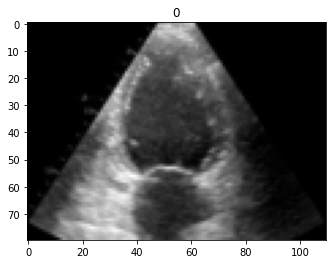

In [0]:
im = images[0][0]
plt.imshow(im,cmap='gray')
plt.title(labels[0].item())

In [0]:
images.shape

torch.Size([100, 3, 80, 110])

In [0]:
labels.shape

torch.Size([100])

In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, H3, D_out): # nn with 3 hidden layers
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, H3)
    self.linear4 = nn.Linear(H3, D_out)
  
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = F.relu(self.linear3(x))
    x = self.linear4(x)
    return x


In [0]:
model = Classifier(8800, 4000, 500, 100, 3)
model

Classifier(
  (linear1): Linear(in_features=8800, out_features=4000, bias=True)
  (linear2): Linear(in_features=4000, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=3, bias=True)
)

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=3f417242164394fccbd62973f46618538f750016df1e831f71c2c19a3718d0a0
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 154.4 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [0]:
printm()

Gen RAM Free: 4.1 GB  | Proc size: 8.9 GB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [0]:

epochs = 50
running_loss_his = []
running_corrects_his = []
val_running_loss_his = []
val_running_corrects_his = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss =0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    # inputs = inputs[0]
    inputs = inputs.view(inputs.shape[0], -1) # flatten 80*110 -> 8800 , inputs shape is (100,8800)
    outputs = model(inputs)
    loss = criterion(outputs, labels) 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_loss += loss.item()

  else:
    with torch.no_grad(): # bcz this the val set, no need to cal grad() here
      for val_inputs , val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, labels)

      _, val_preds = torch.max(val_outputs, 1)
      val_running_loss += val_loss.item()
      val_running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_his.append(epoch_loss)
    running_corrects_his.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(training_loader)
    val_epoch_acc = val_running_corrects.float()/len(training_loader)
    val_running_loss_his.append(val_epoch_loss)
    val_running_corrects_his.append(val_epoch_acc)

    print('epoch ', e, '   training loss: ', epoch_loss, '      acc: ', epoch_acc)
    print('epoch ', e, '   validation loss: ', epoch_loss, '      acc: ', epoch_acc)
    
    torch.save(model, 'model_ep_'+str(e)+'.pt')

epoch  0    training loss:  0.03580463767072863       acc:  tensor(99.3636)
epoch  0    validation loss:  0.03580463767072863       acc:  tensor(99.3636)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Classifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


epoch  1    training loss:  0.025772188044467122       acc:  tensor(99.6061)
epoch  1    validation loss:  0.025772188044467122       acc:  tensor(99.6061)
epoch  2    training loss:  0.061216427037972164       acc:  tensor(98.9545)
epoch  2    validation loss:  0.061216427037972164       acc:  tensor(98.9545)
epoch  3    training loss:  0.018922155320372742       acc:  tensor(99.6818)
epoch  3    validation loss:  0.018922155320372742       acc:  tensor(99.6818)
epoch  4    training loss:  0.0047632239644427145       acc:  tensor(99.9091)
epoch  4    validation loss:  0.0047632239644427145       acc:  tensor(99.9091)
epoch  5    training loss:  0.02970590953720437       acc:  tensor(99.5000)
epoch  5    validation loss:  0.02970590953720437       acc:  tensor(99.5000)
epoch  6    training loss:  0.3625566138395119       acc:  tensor(94.0606)
epoch  6    validation loss:  0.3625566138395119       acc:  tensor(94.0606)
epoch  7    training loss:  0.09510732072962899       acc:  tensor(9

KeyboardInterrupt: ignored

In [0]:
from PIL import Image

tfms = transforms.Compose([transforms.Resize((100,150)),
                                transforms.CenterCrop((80,110)),
                                transforms.Grayscale(),
                                transforms.ToTensor(),
                                transforms.Normalize( [0.5], [0.5])])

img_tensor = Image.open('/content/From40Frs__TOAN 15-3-2018 EF N__2C__IMG-0210-00001.dcm_39.jpg')

# img_tensor = PIL.ImageOps.invert(img_tensor)
img_tensor = img_tensor.convert('1') # only select 1 channel =))

img_tensor = tfms(img_tensor)

sing_img = img_tensor.reshape(1, -1)

_, num = torch.max(model(sing_img), 1)
num